# Exam: Numerical Analysis for Machine Learning

## January 20, 2023

### Exercise 1

Consider the following dataset (Petricoin et al., Lancet, 2002). Each column of A represents measurements taken from a patient. There are 216 columns representing 216 patients, out of which 121 have ovarian cancer. Each row represents the concentration of a different protein in
the genomic signature of the patient. You can download the dataset using the following commands in Colab:

In [1]:
import requests

# ?dl=1 is important for dropbox links to download the file
url1 = "https://www.dropbox.com/s/bal044f83ezxiia/ovariancancer_obs.csv?dl=1"
url2 = "https://www.dropbox.com/s/r52sn5gmkd3y797/ovariancancer_grp.csv?dl=1"

r = requests.get(url1)
with open("ovariancancer_obs.csv", "wb") as f:
    f.write(r.content)

r = requests.get(url2)
with open("ovariancancer_grp.csv", "wb") as f:
    f.write(r.content)

Then, you can create the matrix as follows:

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ovariancancer_obs_path = './ovariancancer_obs.csv'
ovariancancer_grp_path = './ovariancancer_grp.csv'

A = np.genfromtxt(ovariancancer_obs_path, delimiter=',').transpose()
f = open(ovariancancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

n_features = A.shape[0]
n_patients = A.shape[1]
print('%d patients' % n_patients)
print('%d features' % n_features)

216 patients
4000 features


In [29]:
grp_classes = np.unique(grp)
grp_classes

array(['Cancer', 'Normal'], dtype='<U6')

#### 1) Implement the randomized SVD

In [3]:
def randSVD(A, k):
    n = A.shape[1]
    Omega = np.random.randn(n, k)
    Y = A @ Omega
    Q, _ = np.linalg.qr(Y)
    B = Q.transpose() @ A
    U_tilde, S, V = np.linalg.svd(B, full_matrices=False)
    U = Q @ U_tilde
    return U, S, V

#### 2) Perform PCA on the data, by using the exact SVD algorithm. Then, plot the trend w.r.t. $i$ of the singular values $\sigma_i$. Now, repeat the computation by considering the randomized SVD algorithm of rank $k = 1, 5, 10, 50, 100$. Plot the approximate singular values together with the exact singular values. Comment what you see.

In [7]:
A_T = A.T

A_mean = np.mean(A_T, axis=0)
A_std = np.std(A_T, axis=0)

norm_A = (A_T - A_mean) / A_std

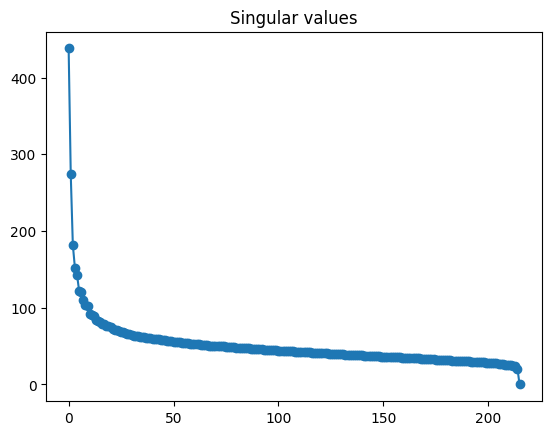

In [9]:
# PCA with exact algorithm

U, S, V = np.linalg.svd(norm_A, full_matrices=False)

fig, ax = plt.subplots()

ax.plot(S, 'o-')
ax.set_title('Singular values')

plt.show()

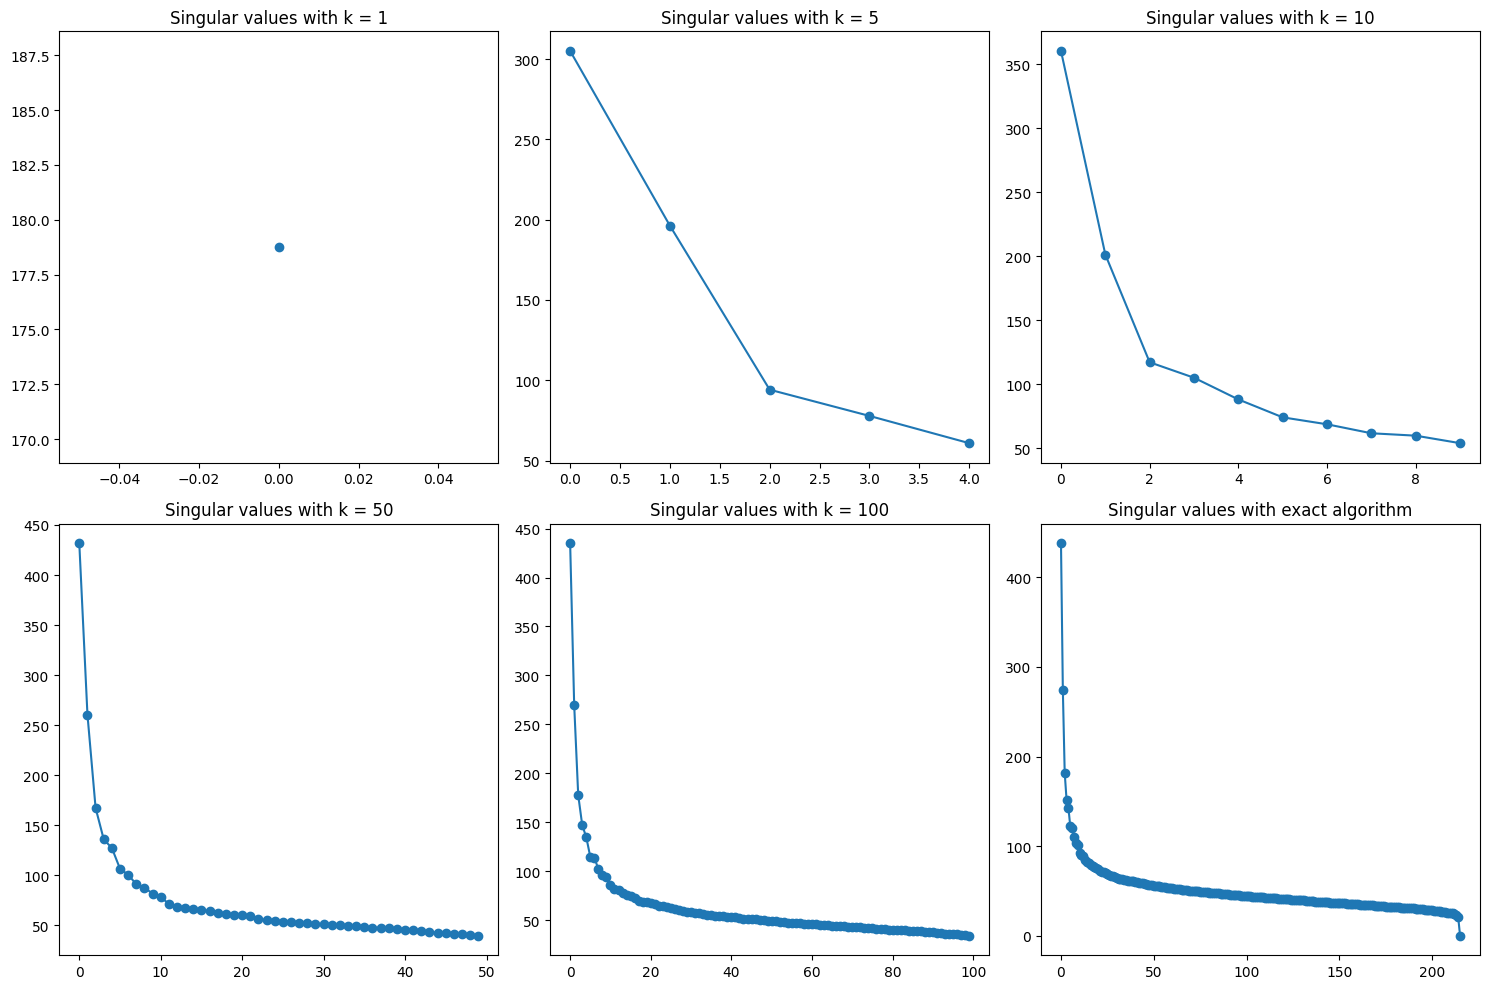

In [17]:
# PCA with randomized algorithm

k = [1, 5, 10, 50, 100]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax = ax.flatten()

for i in k:
    U_rand, S_rand, V_rand = randSVD(norm_A, i)
    ax[k.index(i)].plot(S_rand, 'o-')
    ax[k.index(i)].set_title('Singular values with k = %d' % i)

ax[5].plot(S, 'o-')
ax[5].set_title('Singular values with exact algorithm')

plt.tight_layout()
plt.show()

We observe a rapid decay of the singular values of the data matrix. The first few singular values are significantly bigger than the rest, and the rest seem to stabilize over the value 50. This behavior is also captured by the randomized SVD, and we observe that it resembles more to the exact algorithm the bigger the value of $k$ is. Note that the singular values obtained in the randomized SVD for $k = 50$ are very similar to the first values of the exact algorithm, so if we needed only the first values, we could rely on this technique. 

#### 4) Make a scatterplot of the first 2 principal components of the patients (obtained with exact SVD), by plotting in red the patients in the group "cancer" and in blue the patients in the remaining group. Repeat the same exercise with a rank $k = 2$ randomized SVD. Compute the execution time needed to run the SVD algorithm in the to cases. Comment the results.

In [33]:
import time

Time with exact algorithm: 0.2828 seconds
Time with randomized algorithm: 0.0040 seconds


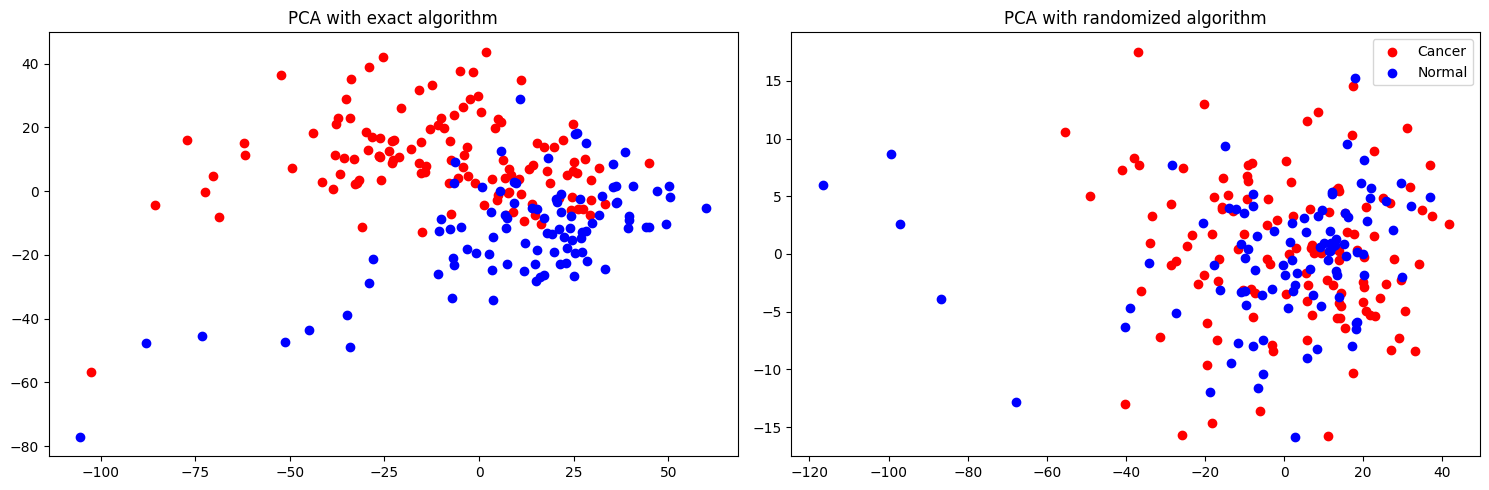

In [54]:
comps = 2
k = 2

# PCA with exact algorithm
time_start = time.time()
U, S, V = np.linalg.svd(norm_A, full_matrices=False)
first_pc_exact = U[:, :comps] @ np.diag(S[:comps])
time_exact = time.time() - time_start

# PCA with randomized algorithm
time_start = time.time()
U_rand, S_rand, V_rand = randSVD(norm_A, k)
first_pc_rand = U_rand[:, :comps] @ np.diag(S_rand[:comps])
time_rand = time.time() - time_start

print('Time with exact algorithm: %.4f seconds' % time_exact)
print('Time with randomized algorithm: %.4f seconds' % time_rand)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(first_pc_exact[:, 0][grp == 'Cancer'], first_pc_exact[:, 1][grp == 'Cancer'], c='r', label='Cancer')
ax[0].scatter(first_pc_exact[:, 0][grp == 'Normal'], first_pc_exact[:, 1][grp == 'Normal'], c='b', label='Normal')
ax[0].set_title('PCA with exact algorithm')

ax[1].scatter(first_pc_rand[:, 0][grp == 'Cancer'], first_pc_rand[:, 1][grp == 'Cancer'], c='r', label='Cancer')
ax[1].scatter(first_pc_rand[:, 0][grp == 'Normal'], first_pc_rand[:, 1][grp == 'Normal'], c='b', label='Normal')
ax[1].set_title('PCA with randomized algorithm')

plt.legend()
plt.tight_layout()
plt.show()

Observe that the randomized algorithm for $k=2$ is orders of magnitude faster than the exact algorithm. However, the results greatly differ. We could approximate better the results of the randomized algorithm by increasing the $k$ value and just keeping the first 2 components.

### Exercise 2

Consider the subset of the Quantum Physics Dataset provided by Cornell University. The goal is to learn a classification rule that differentiates between two types of particles generated in high energy collider experiments. Load the data as follows:

In [ ]:
# DATA NOT AVAILABLE, SO I WILL USE A DIFFERENT DATASET (SYNTHETIC DATA)

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=0)
y = 2 * y - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Classify the data by solving the following minimization problem:
$$ \min_{w} J(w) = \frac{1}{N} \sum_{i} J_i(w)$$

where:
$$J_i(w) = L(w^T x_i, y_i)$$

with $L(s, y) = \log(1 + \exp(-sy))$

#### 1) Implement SGD with batch size $=1$ and constant learning rate equal to $0.5$. Perform $5000$ iterations and initialize the weight vector to zero.

In [120]:
from jax import grad
import jax.numpy as jnp


def loss(w, X, y):
    return jnp.log(1 + jnp.exp(-y * X @ w))

loss_grad = grad(loss)

def sgd(
    X, y, w,
    grad: callable,
    lr: callable, n_iter=5000
):
    for k in range(n_iter):
        idx = np.random.randint(0, X.shape[0])

        w = w - lr(k + 1) * grad(w, X[idx], y[idx])

        # print('Gradient: ', grad(w, X[idx], y[idx]))
        # print('Check gradient: ', check_grad(w, X[idx], y[idx]))
    return w


In [124]:
w = jnp.zeros(X_train.shape[1])

eta = lambda k: 0.5
w1 = sgd(X_train, y_train, w, loss_grad, eta)

y_pred_1 = jnp.sign(X_test @ w)
accuracy1 = jnp.mean(y_pred_1 == y_test)

print('Accuracy: %.4f' % accuracy1)

Accuracy: 0.0000


#### 2) Repeat the minimization using SGD with the following update for the learning rate:
$$\eta_k = \frac{\eta_0}{1 + k/100}$$

#### where $k$ is the iteration and $\eta_0 = 0.05$. Comment the results.

In [125]:
eta = lambda k: 0.05 / (1 + k / 100)
w2 = sgd(X_train, y_train, w, loss_grad, eta)

y_pred_2 = jnp.sign(X_test @ w2)
accuracy2 = jnp.mean(y_pred_2 == y_test)

print('Accuracy: %.4f' % accuracy2)

Accuracy: 0.6600


### Exercise 3

#### 1) Show that a multi-layer neural network with linear activation function $s(x) = x$ is equivalent to a single layer linear network.

**Answer:**

For a multi-layer neural network (MLP) with $\ell$ layers, the output is calculated as:
$$o^{\ell} = \sigma_{\ell}(W^{\ell} o^{\ell - 1} + b^{\ell})$$

where $o^{\ell}$ represents the output of the layer $\ell$, and $\sigma_{\ell}$ represents the activation function of this layer. Note that, if $\sigma_{i}(z) = z$ for $i=1, ..., \ell$, in particular we have that:
$$o^{\ell} = W^{\ell} o^{\ell - 1} + b^{\ell}$$

We can formally prove that this model is equivalent to a single layer linear network, using induction. Assume that $x$ is the input vector:

* For $\ell = 1$, it is trivial:
$$o^1 = W^1 x + b^1$$

* Assume that, for some $\ell \in \N$, it is true that there exists $\tilde{W}^{\ell}$ and $\tilde{b}^{\ell}$ such that:
$$o^{\ell} = W^{\ell} o^{\ell - 1} + b^{\ell} = \tilde{W}^{\ell} x + \tilde{b}^{\ell}$$

* Prove that this is also true for $\ell + 1$:

$$o^{\ell+1} = W^{\ell+1} o^{\ell} + b^{\ell+1}$$
$$= W^{\ell+1}(\tilde{W}^{\ell} x + \tilde{b}^{\ell}) + b^{\ell+1}$$
$$= W^{\ell+1} \tilde{W}^{\ell} x + W^{\ell+1} \tilde{b}^{\ell} + b^{\ell+1}$$

If:
$$\tilde{W}^{\ell+1} = W^{\ell+1} \tilde{W}^{\ell}, \quad \tilde{b}^{\ell+1} = W^{\ell+1} \tilde{b}^{\ell} + b^{\ell+1}$$

Then:
$$o^{\ell+1} = \tilde{W}^{\ell+1} x + \tilde{b}^{\ell}$$

Completing the proof.

#### 2) Assume that in each layer the inputs follow a Normal distribution with mean zero and small variance, i.e. σ ≪ 1. For which of the activation functions s(x) = 1/(1 + exp(−x)), s(x) = tanh(x), s(x) = relu(x) and s(x) = selu(x) is a deep network equivalent to a linear network for the given distribution? The selu function is given by:

$$selu(x) = \begin{cases} \lambda x & x > 0 \\ \alpha ( \exp(x) - 1 ) & \text{otherwise}\end{cases}$$

#### where $\lambda = 1.0507$ and $\alpha = 1.75814$. (*Hint*: consider the case $\sigma \to 0$ using a Taylor expansion around 0)

**Answer:**

As we are assuming that the input of each layer follows a normal distribution with mean 0 and very low variance, we can assume that the data is very close to 0. Then, we only need to focus on how each function behaves close to 0. 

For this, we can use the Taylor expansion for each of them:

* Sigmoid: $s(x) \approx \frac{1}{2} + \frac{x}{4} + O(x^2)$.

    Note that this function behaves as an affine function close to zero, so it does not have a pure linear behavior.

* Hyperbolic tangent: $s(x) \approx x + O(x^2)$

    This function indeed approximates a pure linear function close to zero.

* ReLU: This function is non differentiable at $x = 0$, but notice that, for half of the expected inputs, this function will behave as a pure linear, but will convert to 0 the other half. This is exactly what prevents ReLU from being linear. 

* SELU: $s(x) \approx \begin{cases} \lambda x & x > 0 \\ \alpha x & x \leq 0 \end{cases}$

    This function behaves as a piecewise linear function close to 0 (can be proven by obtaining the Taylor expasion of $\exp(x)$). The problem is that this will not show a purely linear behavior unless $\lambda \approx \alpha$, which is not the case.